# Linear Regression Starter Kit for Kaggle House Prices 

## Imports and inits

In [39]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch 
h2o.init() # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_102"; OpenJDK Runtime Environment (Zulu 8.17.0.3-macosx) (build 1.8.0_102-b14); OpenJDK 64-Bit Server VM (Zulu 8.17.0.3-macosx) (build 25.102-b14, mixed mode)
  Starting server from /Users/yy/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/_6/rl8w_p251xxct6hj32x01drc0000gn/T/tmpb2fuuikm
  JVM stdout: /var/folders/_6/rl8w_p251xxct6hj32x01drc0000gn/T/tmpb2fuuikm/h2o_yy_started_from_python.out
  JVM stderr: /var/folders/_6/rl8w_p251xxct6hj32x01drc0000gn/T/tmpb2fuuikm/h2o_yy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_yy_wv7tt3
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


## Import data

###### Adding a new "Salesprice" column, impute random numbers between 10,000 and 100000000000 to fix the h2o bug.

In [40]:
train = h2o.import_file('/Users/yy/Documents/DNSC_ML/regression/train.csv')
test = h2o.import_file('/Users/yy/Documents/DNSC_ML/regression/test.csv')

# bug fix - from Keston
dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'SalePrice'
test.columns = cols
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 81)


In [69]:
train.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageFinish_Tencode,GarageType_Tencode,Street_Tencode,RoofStyle_Tencode,FireplaceQu_Tencode,LandContour_Tencode,BsmtFinType1_Tencode,BsmtExposure_Tencode,HeatingQC_Tencode,Alley_Tencode,SaleType_Tencode,MasVnrType_Tencode,GarageCond_Tencode,PavedDrive_Tencode,BsmtQual_Tencode,HouseStyle_Tencode,ExterCond_Tencode,BsmtCond_Tencode,PoolQC_Tencode,Functional_Tencode,SaleCondition_Tencode,MiscFeature_Tencode,Neighborhood_Tencode,CentralAir_Tencode,Exterior2nd_Tencode,Heating_Tencode,Condition2_Tencode,KitchenQual_Tencode,BsmtFinType2_Tencode,Exterior1st_Tencode,Utilities_Tencode,LandSlope_Tencode,Electrical_Tencode,RoofMatl_Tencode,Foundation_Tencode,ExterQual_Tencode,BldgType_Tencode,Condition1_Tencode,MSZoning_Tencode,LotShape_Tencode,Fence_Tencode,GarageQual_Tencode,LotConfig_Tencode,MSZoning_Tencode|YearBuilt,MSZoning_Tencode|RoofStyle_Tencode,MSZoning_Tencode|BsmtFinType2_Tencode,MSZoning_Tencode|GarageArea,MSZoning_Tencode|LotArea,MSZoning_Tencode|KitchenAbvGr,MSZoning_Tencode|RoofMatl_Tencode,MSZoning_Tencode|BsmtFullBath,MSZoning_Tencode|MSSubClass,MSZoning_Tencode|BsmtCond_Tencode,MSZoning_Tencode|YearRemodAdd,MSZoning_Tencode|LowQualFinSF,MSZoning_Tencode|GrLivArea,MSZoning_Tencode|FullBath,MSZoning_Tencode|Foundation_Tencode,MSZoning_Tencode|TotRmsAbvGrd,MSZoning_Tencode|FireplaceQu_Tencode,MSZoning_Tencode|Utilities_Tencode,MSZoning_Tencode|Electrical_Tencode,MSZoning_Tencode|GarageYrBlt,MSZoning_Tencode|Exterior2nd_Tencode,MSZoning_Tencode|MasVnrArea,MSZoning_Tencode|Fence_Tencode,MSZoning_Tencode|BsmtUnfSF,MSZoning_Tencode|SaleType_Tencode,MSZoning_Tencode|KitchenQual_Tencode,MSZoning_Tencode|BsmtFinSF2,MSZoning_Tencode|3SsnPorch,MSZoning_Tencode|1stFlrSF,MSZoning_Tencode|GarageQual_Tencode,MSZoning_Tencode|Condition2_Tencode,MSZoning_Tencode|OverallCond,MSZoning_Tencode|YrSold,MSZoning_Tencode|LandContour_Tencode,MSZoning_Tencode|HouseStyle_Tencode,MSZoning_Tencode|GarageCars,MSZoning_Tencode|GarageFinish_Tencode,MSZoning_Tencode|MoSold,MSZoning_Tencode|OpenPorchSF,MSZoning_Tencode|BldgType_Tencode,MSZoning_Tencode|TotalBsmtSF,MSZoning_Tencode|HeatingQC_Tencode,MSZoning_Tencode|EnclosedPorch,MSZoning_Tencode|OverallQual,MSZoning_Tencode|ScreenPorch,MSZoning_Tencode|CentralAir_Tencode,MSZoning_Tencode|Fireplaces,MSZoning_Tencode|BedroomAbvGr,MSZoning_Tencode|Street_Tencode,MSZoning_Tencode|HalfBath,MSZoning_Tencode|PoolQC_Tencode,MSZoning_Tencode|PoolArea,MSZoning_Tencode|BsmtHalfBath,MSZoning_Tencode|Alley_Tencode,MSZoning_Tencode|LotFrontage,MSZoning_Tencode|Exterior1st_Tencode,MSZoning_Tencode|Heating_Tencode,MSZoning_Tencode|BsmtFinSF1,MSZoning_Tencode|LandSlope_Tencode,MSZoning_Tencode|ExterCond_Tencode,MSZoning_Tencode|GarageType_Tencode,MSZoning_Tencode|GarageCond_Tencode,MSZoning_Tencode|ExterQual_Tencode,MSZoning_Tencode|LotShape_Tencode,MSZoning_Tencode|MiscFeature_Tencode,MSZoning_Tencode|WoodDeckSF,MSZoning_Tencode|Condition1_Tencode,MSZoning_Tencode|BsmtExposure_Tencode,MSZoning_Tencode|Neighborhood_Tencode,MSZoning_Tencode|BsmtQual_Tencode,MSZoning_Tencode|PavedDrive_Tencode,MSZoning_Tencode|SaleCondition_Tencode,MSZoning_Tencode|BsmtFinType1_Tencode,MSZoning_Tenco

In [70]:
test.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageFinish_Tencode,GarageType_Tencode,Street_Tencode,RoofStyle_Tencode,FireplaceQu_Tencode,LandContour_Tencode,BsmtFinType1_Tencode,BsmtExposure_Tencode,HeatingQC_Tencode,Alley_Tencode,SaleType_Tencode,MasVnrType_Tencode,GarageCond_Tencode,PavedDrive_Tencode,BsmtQual_Tencode,HouseStyle_Tencode,ExterCond_Tencode,BsmtCond_Tencode,PoolQC_Tencode,Functional_Tencode,SaleCondition_Tencode,MiscFeature_Tencode,Neighborhood_Tencode,CentralAir_Tencode,Exterior2nd_Tencode,Heating_Tencode,Condition2_Tencode,KitchenQual_Tencode,BsmtFinType2_Tencode,Exterior1st_Tencode,Utilities_Tencode,LandSlope_Tencode,Electrical_Tencode,RoofMatl_Tencode,Foundation_Tencode,ExterQual_Tencode,BldgType_Tencode,Condition1_Tencode,MSZoning_Tencode,LotShape_Tencode,Fence_Tencode,GarageQual_Tencode,LotConfig_Tencode,MSZoning_Tencode|YearBuilt,MSZoning_Tencode|RoofStyle_Tencode,MSZoning_Tencode|BsmtFinType2_Tencode,MSZoning_Tencode|GarageArea,MSZoning_Tencode|LotArea,MSZoning_Tencode|KitchenAbvGr,MSZoning_Tencode|RoofMatl_Tencode,MSZoning_Tencode|BsmtFullBath,MSZoning_Tencode|MSSubClass,MSZoning_Tencode|BsmtCond_Tencode,MSZoning_Tencode|YearRemodAdd,MSZoning_Tencode|LowQualFinSF,MSZoning_Tencode|GrLivArea,MSZoning_Tencode|FullBath,MSZoning_Tencode|Foundation_Tencode,MSZoning_Tencode|TotRmsAbvGrd,MSZoning_Tencode|FireplaceQu_Tencode,MSZoning_Tencode|Utilities_Tencode,MSZoning_Tencode|Electrical_Tencode,MSZoning_Tencode|GarageYrBlt,MSZoning_Tencode|Exterior2nd_Tencode,MSZoning_Tencode|MasVnrArea,MSZoning_Tencode|Fence_Tencode,MSZoning_Tencode|BsmtUnfSF,MSZoning_Tencode|SaleType_Tencode,MSZoning_Tencode|KitchenQual_Tencode,MSZoning_Tencode|BsmtFinSF2,MSZoning_Tencode|3SsnPorch,MSZoning_Tencode|1stFlrSF,MSZoning_Tencode|GarageQual_Tencode,MSZoning_Tencode|Condition2_Tencode,MSZoning_Tencode|OverallCond,MSZoning_Tencode|YrSold,MSZoning_Tencode|LandContour_Tencode,MSZoning_Tencode|HouseStyle_Tencode,MSZoning_Tencode|GarageCars,MSZoning_Tencode|GarageFinish_Tencode,MSZoning_Tencode|MoSold,MSZoning_Tencode|OpenPorchSF,MSZoning_Tencode|BldgType_Tencode,MSZoning_Tencode|TotalBsmtSF,MSZoning_Tencode|HeatingQC_Tencode,MSZoning_Tencode|EnclosedPorch,MSZoning_Tencode|OverallQual,MSZoning_Tencode|ScreenPorch,MSZoning_Tencode|CentralAir_Tencode,MSZoning_Tencode|Fireplaces,MSZoning_Tencode|BedroomAbvGr,MSZoning_Tencode|Street_Tencode,MSZoning_Tencode|HalfBath,MSZoning_Tencode|PoolQC_Tencode,MSZoning_Tencode|PoolArea,MSZoning_Tencode|BsmtHalfBath,MSZoning_Tencode|Alley_Tencode,MSZoning_Tencode|LotFrontage,MSZoning_Tencode|Exterior1st_Tencode,MSZoning_Tencode|Heating_Tencode,MSZoning_Tencode|BsmtFinSF1,MSZoning_Tencode|LandSlope_Tencode,MSZoning_Tencode|ExterCond_Tencode,MSZoning_Tencode|GarageType_Tencode,MSZoning_Tencode|GarageCond_Tencode,MSZoning_Tencode|ExterQual_Tencode,MSZoning_Tencode|LotShape_Tencode,MSZoning_Tencode|MiscFeature_Tencode,MSZoning_Tencode|WoodDeckSF,MSZoning_Tencode|Condition1_Tencode,MSZoning_Tencode|BsmtExposure_Tencode,MSZoning_Tencode|Neighborhood_Tencode,MSZoning_Tencode|BsmtQual_Tencode,MSZoning_Tencode|PavedDrive_Tencode,MSZoning_Tencode|SaleCondition_Tencode,MSZoning_Tencode|BsmtFinType1_Tencode,MSZoning_Tenco

#### Determine data types

In [41]:
def get_type_lists(frame=train, rejects=['Id', 'SalePrice']):

    """Creates lists of numeric and categorical variables.
    
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.
    
    """
    
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [42]:
original_nums, cats = get_type_lists()

Numeric = ['YearBuilt', 'GarageArea', 'LotArea', 'KitchenAbvGr', 'BsmtFullBath', 'MSSubClass', 'YearRemodAdd', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFinSF2', 'OverallCond', 'YrSold', 'GarageCars', 'OpenPorchSF', 'TotalBsmtSF', 'EnclosedPorch', 'OverallQual', 'ScreenPorch', 'Fireplaces', 'BedroomAbvGr', 'HalfBath', 'PoolArea', 'BsmtHalfBath', '1stFlrSF', 'BsmtFinSF1', '3SsnPorch', 'LotFrontage', 'MoSold', '2ndFlrSF', 'WoodDeckSF', 'MiscVal']

Categorical = ['GarageFinish', 'GarageType', 'Street', 'RoofStyle', 'FireplaceQu', 'LandContour', 'BsmtFinType1', 'BsmtExposure', 'HeatingQC', 'Alley', 'SaleType', 'MasVnrType', 'GarageCond', 'PavedDrive', 'BsmtQual', 'HouseStyle', 'ExterCond', 'BsmtCond', 'PoolQC', 'Functional', 'SaleCondition', 'MiscFeature', 'Neighborhood', 'CentralAir', 'Exterior2nd', 'Heating', 'Condition2', 'KitchenQual', 'BsmtFinType2', 'Exterior1st', 'Utilities', 'LandSlope', 'Electrical', 'RoofMatl', 'Founda

## Split into to train and validation (before doing data prep!!!)

###### The reason we split the training data before doing data preparation is to aviod overfitting because there maybe data leakage when doing data preparation. 

In [43]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(1001, 81)
(459, 81)


## Impute numeric missing

In [44]:
# median usually better than mean
# (_ signifies temporary throw-away variable, used to suppress output)
_ = train[['MasVnrArea', 'GarageYrBlt', 'LotFrontage']].impute(method='median')
_ = valid[['MasVnrArea', 'GarageYrBlt', 'LotFrontage']].impute(method='median')
_ = test[['BsmtHalfBath', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtUnfSF', 'MasVnrArea', 
          'GarageYrBlt', 'LotFrontage', 'GarageCars', 'TotalBsmtSF', 'GarageArea']].impute(method='median')

## Encode categorical vars using shrunken averages
http://helios.mm.di.uoa.gr/~rouvas/ssi/sigkdd/sigkdd.vol3.1/barreca.ps

In [45]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    """ Applies simple target encoding to categorical variables.

    :param training_frame: Training frame which to create target means and to be encoded.
    :param test_frame: Test frame to be encoded using information from training frame.
    :param x: Name of input variable to be encoded.
    :param y: Name of target variable to use for encoding.
    :param lambda_: Balance between level mean and overall mean for small groups.
    :param threshold: Number below which a level is considered small enough to be shrunken.
    :param test: Whether or not to print the row_val_dict for testing purposes.
    :return: Tuple of encoded variable from train and test set as H2OFrames.

    """

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)


#### Execute encoding

In [46]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'SalePrice')
    v_enc, ts_enc = target_encoder(valid, test, var, 'SalePrice')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: GarageFinish (1/43) ...
Encoding: GarageType (2/43) ...
Encoding: Street (3/43) ...
Encoding: RoofStyle (4/43) ...
Encoding: FireplaceQu (5/43) ...
Encoding: LandContour (6/43) ...
Encoding: BsmtFinType1 (7/43) ...
Encoding: BsmtExposure (8/43) ...
Encoding: HeatingQC (9/43) ...
Encoding: Alley (10/43) ...
Encoding: SaleType (11/43) ...
Encoding: MasVnrType (12/43) ...
Encoding: GarageCond (13/43) ...
Encoding: PavedDrive (14/43) ...
Encoding: BsmtQual (15/43) ...
Encoding: HouseStyle (16/43) ...
Encoding: ExterCond (17/43) ...
Encoding: BsmtCond (18/43) ...
Encoding: PoolQC (19/43) ...
Encoding: Functional (20/43) ...
Encoding: SaleCondition (21/43) ...
Encoding: MiscFeature (22/43) ...
Encoding: Neighborhood (23/43) ...
Encoding: CentralAir (24/43) ...
Encoding: Exterior2nd (25/43) ...
Encoding: Heating (26/43) ...
Encoding: Condition2 (27/43) ...
Encoding: KitchenQual (28/43) ...
Encoding: BsmtFinType2 (29/43) ...
Encoding: Exterior1st (30/43) ...
Encoding: Utilities (31/4

#### Redefine numerics and explore

In [47]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['MSZoning_Tencode', 'YearBuilt', 'RoofStyle_Tencode', 'BsmtFinType2_Tencode', 'GarageArea', 'LotArea', 'KitchenAbvGr', 'RoofMatl_Tencode', 'BsmtFullBath', 'MSSubClass', 'BsmtCond_Tencode', 'YearRemodAdd', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'Foundation_Tencode', 'TotRmsAbvGrd', 'FireplaceQu_Tencode', 'Utilities_Tencode', 'Electrical_Tencode', 'GarageYrBlt', 'Exterior2nd_Tencode', 'MasVnrArea', 'Fence_Tencode', 'BsmtUnfSF', 'SaleType_Tencode', 'KitchenQual_Tencode', 'BsmtFinSF2', '3SsnPorch', '1stFlrSF', 'GarageQual_Tencode', 'Condition2_Tencode', 'OverallCond', 'YrSold', 'LandContour_Tencode', 'HouseStyle_Tencode', 'GarageCars', 'GarageFinish_Tencode', 'MoSold', 'OpenPorchSF', 'BldgType_Tencode', 'TotalBsmtSF', 'HeatingQC_Tencode', 'EnclosedPorch', 'OverallQual', 'ScreenPorch', 'CentralAir_Tencode', 'Fireplaces', 'BedroomAbvGr', 'Street_Tencode', 'HalfBath', 'PoolQC_Tencode', 'PoolArea', 'BsmtHalfBath', 'Alley_Tencode', 'LotFrontage', 'Exterior1st_Tencode', 'Heating_Ten

In [48]:
print('Imputed and encoded numeric training data:')
train[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric validation data:')
valid[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric test data:')
test[encoded_nums].describe() #79 numeric columns w/ no missing

Imputed and encoded numeric training data:
Rows:1001
Cols:79




,MSZoning_Tencode,YearBuilt,RoofStyle_Tencode,BsmtFinType2_Tencode,GarageArea,LotArea,KitchenAbvGr,RoofMatl_Tencode,BsmtFullBath,MSSubClass,BsmtCond_Tencode,YearRemodAdd,LowQualFinSF,GrLivArea,FullBath,Foundation_Tencode,TotRmsAbvGrd,FireplaceQu_Tencode,Utilities_Tencode,Electrical_Tencode,GarageYrBlt,Exterior2nd_Tencode,MasVnrArea,Fence_Tencode,BsmtUnfSF,SaleType_Tencode,KitchenQual_Tencode,BsmtFinSF2,3SsnPorch,1stFlrSF,GarageQual_Tencode,Condition2_Tencode,OverallCond,YrSold,LandContour_Tencode,HouseStyle_Tencode,GarageCars,GarageFinish_Tencode,MoSold,OpenPorchSF,BldgType_Tencode,TotalBsmtSF,HeatingQC_Tencode,EnclosedPorch,OverallQual,ScreenPorch,CentralAir_Tencode,Fireplaces,BedroomAbvGr,Street_Tencode,HalfBath,PoolQC_Tencode,PoolArea,BsmtHalfBath,Alley_Tencode,LotFrontage,Exterior1st_Tencode,Heating_Tencode,BsmtFinSF1,LandSlope_Tencode,ExterCond_Tencode,GarageType_Tencode,GarageCond_Tencode,ExterQual_Tencode,LotShape_Tencode,MiscFeature_Tencode,WoodDeckSF,Condition1_Tencode,BsmtExposure_Tencode,Neighborhood_Tencode,BsmtQual_Tencode,PavedDrive_Tencode,SaleCondition_Tencode,BsmtFinType1_Tencode,Functional_Tencode,2ndFlrSF,MasVnrType_Tencode,LotConfig_Tencode,MiscVal
type,real,int,real,real,int,int,int,real,int,int,real,int,int,int,int,real,int,real,real,real,real,real,real,real,int,real,real,int,int,int,real,real,int,int,real,real,int,real,int,int,real,int,real,int,int,int,real,int,int,real,int,real,int,int,real,real,real,real,int,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,int,real,real,int
mins,78614.79385614385,1875.0,161577.2224275724,154536.9355228105,0.0,1300.0,0.0,143775.79385614386,0.0,20.0,84275.79385614385,1950.0,0.0,480.0,0.0,121726.89385614387,3.0,141462.34885614386,144200.79385614386,84275.79385614385,1908.0,129978.23968947721,0.0,141306.73814185814,0.0,125968.29385614385,124936.94820396995,0.0,0.0,480.0,96813.29385614385,108075.79385614385,2.0,2006.0,145140.16285614387,118907.22242757239,0.0,141354.57177033494,1.0,0.0,138273.46052281052,0.0,135668.69902855766,0.0,2.0,0.0,119608.23368665231,0.0,0.0,146350.10385614386,0.0,182171.95904095902,0.0,0.0,128075.200999001,21.0,78325.79385614385,93469.96052281052,0.0,181486.5182747485,122047.14941169939,125174.9605228105,112070.79385614385,116078.96885614384,163944.59385614382,140375.79385614386,0.0,134468.29385614386,167645.4123076923,109690.79385614385,121216.12093947716,129253.89464979463,115832.04385614385,150410.4464877228,110059.12718947718,0.0,155578.6188811189,176473.2899159664,0.0
mean,183387.92640181992,1972.2987012987012,182159.00869385363,184056.7578759402,477.46853146853147,10628.262737262738,1.046953046953047,182033.94005549897,0.42657342657342656,57.08791208791209,184043.11900766566,1985.138861138861,5.9250749250749255,1519.8011988011988,1.5744255744255744,183119.90242260235,6.512487512487512,200266.80114860163,182178.65314071544,182952.64128239392,1978.734522560336,183994.52609268852,106.91146881287727,177450.87030976015,575.99000999001,181180.3311701286,180810.97023994985,41.64935064935066,3.4565434565434567,1172.0889110889111,186018.32971548932,182224.4420403772,5.583416583416583,2007.828171828172,182186.73299732234,183188.25635258845,1.7932067932067932,185712.8721618042,6.362637362637362,44.92407592407592,182849.79797600003,1063.2387612387613,182409.7085632649,21.257742257742258,6.1448551448551445,14.763236763236764,182822.70708043207,0.6203796203796204,2.871128871128871,182203.5349842964,0.38161838161838163,182802.8256832079,3.3766233766233764,0.059940059940059943,180171.38546862727,70.59975669099757,183565.71379414795,182323.579859551,445.5994005994006,182145.0556687069,182637.23505924648,185255.62265751234,186002.74671607107,181095.69602749898,181993.9278632456,181198.19224147478,91.07392607392607,182645.11776425375,182844.62529074325,182171.95904095905,182245.41278741238,182908.18055950044,181541.32494458588,185645.79515235015,182576.24533688094,341.7872127872128,180574.40004970058,181772.16118142597,39.6843156843

--------------------------------------------------------------------------------
Imputed and encoded numeric validation data:
Rows:459
Cols:79




,MSZoning_Tencode,YearBuilt,RoofStyle_Tencode,BsmtFinType2_Tencode,GarageArea,LotArea,KitchenAbvGr,RoofMatl_Tencode,BsmtFullBath,MSSubClass,BsmtCond_Tencode,YearRemodAdd,LowQualFinSF,GrLivArea,FullBath,Foundation_Tencode,TotRmsAbvGrd,FireplaceQu_Tencode,Utilities_Tencode,Electrical_Tencode,GarageYrBlt,Exterior2nd_Tencode,MasVnrArea,Fence_Tencode,BsmtUnfSF,SaleType_Tencode,KitchenQual_Tencode,BsmtFinSF2,3SsnPorch,1stFlrSF,GarageQual_Tencode,Condition2_Tencode,OverallCond,YrSold,LandContour_Tencode,HouseStyle_Tencode,GarageCars,GarageFinish_Tencode,MoSold,OpenPorchSF,BldgType_Tencode,TotalBsmtSF,HeatingQC_Tencode,EnclosedPorch,OverallQual,ScreenPorch,CentralAir_Tencode,Fireplaces,BedroomAbvGr,Street_Tencode,HalfBath,PoolQC_Tencode,PoolArea,BsmtHalfBath,Alley_Tencode,LotFrontage,Exterior1st_Tencode,Heating_Tencode,BsmtFinSF1,LandSlope_Tencode,ExterCond_Tencode,GarageType_Tencode,GarageCond_Tencode,ExterQual_Tencode,LotShape_Tencode,MiscFeature_Tencode,WoodDeckSF,Condition1_Tencode,BsmtExposure_Tencode,Neighborhood_Tencode,BsmtQual_Tencode,PavedDrive_Tencode,SaleCondition_Tencode,BsmtFinType1_Tencode,Functional_Tencode,2ndFlrSF,MasVnrType_Tencode,LotConfig_Tencode,MiscVal
type,real,int,real,real,int,int,int,real,int,int,real,int,int,int,int,real,int,real,real,real,real,real,real,real,int,real,real,int,int,int,real,real,int,int,real,real,int,real,int,int,real,int,real,int,int,int,real,int,int,real,int,real,int,int,real,real,real,real,int,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,int,real,real,int
mins,118217.35784313723,1872.0,139864.02450980392,145091.52450980392,0.0,1491.0,1.0,175904.02450980392,0.0,20.0,78579.02450980392,1950.0,0.0,334.0,0.0,110363.31736694675,2.0,133191.52450980392,178193.4967320261,100143.52450980392,1900.0,106204.02450980392,0.0,133419.96200980392,0.0,107734.02450980392,105130.89950980392,0.0,0.0,334.0,134853.20367647058,84954.02450980392,1.0,2006.0,163075.56297134238,122402.59593837534,0.0,143948.79679144386,1.0,0.0,128987.56617647059,0.0,100679.02450980392,0.0,1.0,0.0,111601.52450980392,0.0,0.0,95579.02450980392,0.0,178193.4967320261,0.0,0.0,134607.54723707662,21.0,96429.02450980392,77729.02450980392,0.0,175531.83179723503,91754.02450980392,111434.07450980392,118776.94117647059,91042.14950980392,163981.4191419142,73479.02450980392,0.0,150223.0311764706,161376.63366336632,112866.7168174962,134771.7517825312,114840.96895424835,143816.52450980392,146338.19117647054,84954.02450980392,0.0,131576.52450980392,165751.57330498463,0.0
mean,179328.32668845312,1969.0196078431372,177381.1458157119,180587.6997415524,463.1917211328976,10273.808278867102,1.0457516339869284,177969.71943483275,0.4226579520697168,56.48148148148148,180413.2355397497,1984.2701525054467,5.668845315904139,1506.004357298475,1.5446623093681917,179041.90369302404,6.529411764705882,194587.7731541999,178193.49673202608,179083.6277286514,1977.9953051643192,179728.60882139349,96.68340611353712,173941.1787702735,548.1590413943355,177239.63702422145,177298.2844312017,57.23529411764706,3.30718954248366,1141.9912854030501,184195.20382758768,178197.18104147978,5.557734204793029,2007.7886710239652,177854.22806185653,177648.76674783204,1.710239651416122,181122.03431372548,6.233115468409586,50.446623093681914,178649.14910504507,1044.7603485838779,180663.6615169379,23.47276688453159,6.0,15.710239651416122,179115.18492887347,0.5969498910675382,2.8562091503267975,178225.25931265755,0.38562091503267976,178198.69396030012,1.411764705882353,0.05228758169934641,176164.9969256838,68.85751978891822,179651.10523303002,178371.04867785895,439.36601307189545,177815.9926203597,178484.55631381093,185134.5307937118,184432.0126553889,174940.2994916485,176786.22238241704,177409.66351972887,101.15904139433552,178617.62590029472,178366.110436157,178193.49673202613,179069.59942970652,179002.96058140032,177335.48292323467,180031.30962236744,178425.73264556366,358.3442265795207,176108.20460862634,178163.26637404418,51.78649237472766
maxs,219311.69

--------------------------------------------------------------------------------
Imputed and encoded numeric test data:
Rows:1459
Cols:79




,MSZoning_Tencode,YearBuilt,RoofStyle_Tencode,BsmtFinType2_Tencode,GarageArea,LotArea,KitchenAbvGr,RoofMatl_Tencode,BsmtFullBath,MSSubClass,BsmtCond_Tencode,YearRemodAdd,LowQualFinSF,GrLivArea,FullBath,Foundation_Tencode,TotRmsAbvGrd,FireplaceQu_Tencode,Utilities_Tencode,Electrical_Tencode,GarageYrBlt,Exterior2nd_Tencode,MasVnrArea,Fence_Tencode,BsmtUnfSF,SaleType_Tencode,KitchenQual_Tencode,BsmtFinSF2,3SsnPorch,1stFlrSF,GarageQual_Tencode,Condition2_Tencode,OverallCond,YrSold,LandContour_Tencode,HouseStyle_Tencode,GarageCars,GarageFinish_Tencode,MoSold,OpenPorchSF,BldgType_Tencode,TotalBsmtSF,HeatingQC_Tencode,EnclosedPorch,OverallQual,ScreenPorch,CentralAir_Tencode,Fireplaces,BedroomAbvGr,Street_Tencode,HalfBath,PoolQC_Tencode,PoolArea,BsmtHalfBath,Alley_Tencode,LotFrontage,Exterior1st_Tencode,Heating_Tencode,BsmtFinSF1,LandSlope_Tencode,ExterCond_Tencode,GarageType_Tencode,GarageCond_Tencode,ExterQual_Tencode,LotShape_Tencode,MiscFeature_Tencode,WoodDeckSF,Condition1_Tencode,BsmtExposure_Tencode,Neighborhood_Tencode,BsmtQual_Tencode,PavedDrive_Tencode,SaleCondition_Tencode,BsmtFinType1_Tencode,Functional_Tencode,2ndFlrSF,MasVnrType_Tencode,LotConfig_Tencode,MiscVal
type,real,int,real,real,real,int,int,real,real,int,real,int,int,int,int,real,int,real,real,real,real,real,real,real,real,real,real,real,int,int,real,real,int,int,real,real,real,real,int,int,real,real,real,int,int,int,real,int,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,int,real,real,int
mins,118217.35784313723,1879.0,139864.02450980392,145091.52450980392,0.0,1470.0,0.0,175904.02450980392,0.0,20.0,78579.02450980392,1950.0,0.0,407.0,0.0,110363.31736694675,3.0,133191.52450980392,178193.4967320261,100143.52450980392,1895.0,106204.02450980392,0.0,133419.96200980392,0.0,107734.02450980392,105130.89950980392,0.0,0.0,407.0,134853.20367647058,127029.02450980392,1.0,2006.0,163075.56297134238,122402.59593837534,0.0,143948.79679144386,1.0,0.0,128987.56617647059,0.0,100679.02450980392,0.0,1.0,0.0,111601.52450980392,0.0,0.0,95579.02450980392,0.0,178193.4967320261,0.0,0.0,134607.54723707662,21.0,96429.02450980392,77729.02450980392,0.0,175531.83179723503,91754.02450980392,111434.07450980392,118776.94117647059,91042.14950980392,163981.4191419142,73479.02450980392,0.0,150223.0311764706,161376.63366336632,112866.7168174962,134771.7517825312,114840.96895424835,143816.52450980392,146338.19117647054,84954.02450980392,0.0,131576.52450980392,165751.57330498463,0.0
mean,179232.09043019172,1971.357779300891,177370.7037166422,180689.57815766832,472.7688614540466,9819.161069225496,1.0424948594928032,176751.75320615337,0.4344543582704186,57.37834132967786,179283.61725237887,1983.6627827278958,3.5435229609321452,1486.0459218642907,1.570938999314599,181006.2901857593,6.385195339273475,194452.82035270391,178193.4967320261,180126.1193152811,1977.7212165097756,180995.23531825157,100.70914127423823,174246.9783571091,554.2949245541838,175933.1071534587,179340.3962464452,52.61934156378601,1.794379712131597,1156.534612748458,182567.66333366183,178369.3998087346,5.5538039753255655,2007.7697052775875,179174.22633752596,176296.0327526845,1.766117969821674,180987.1789957136,6.104180945853324,48.3139136394791,178370.36965515942,1046.1179698216736,182227.81273899964,24.24331734064428,6.078821110349555,17.064427690198766,179789.60281035837,0.5812200137080191,2.8540095956134337,178065.09267032953,0.3776559287183002,178193.4967320261,1.7443454420836186,0.06520247083047358,176172.85149770897,68.58035714285714,179810.686881209,179140.3483394936,439.2037037037037,177395.21920765375,178138.29247727423,186339.7089378328,184620.93755108098,177673.68837649442,176844.0836371834,177606.2442188893,93.17477724468814,179939.77372747526,179354.86101843632,179660.9318538107,181062.1068968766,177090.15440559445,176492.09637795313,182091.99147253158,178383.03720943845,325.96778615490064,178207.0798692451,178278.00897433652,58.1679232350925

In [49]:
# Check Neighborhood_Tencode

print(test[0:5, ['Neighborhood', 'Neighborhood_Tencode']])
_, _ = target_encoder(valid, test, 'Neighborhood', 'SalePrice', test=True)
del _

# NAmes   152080
# NAmes   152080
# Gilbert 191808
# Gilbert 191808
# StoneBr 288359

Neighborhood,Neighborhood_Tencode
NAmes,152080
NAmes,152080
Gilbert,191808
Gilbert,191808
StoneBr,288359



{nan: 178193.49673202613, 'BrkSide': 129965.77450980392, 'Somerst': 227656.9671023965, 'Veenker': 243734.02450980392, 'StoneBr': 288359.0245098039, 'NWAmes': 184610.14950980392, 'OldTown': 139863.03613771088, 'CollgCr': 190019.77971813726, 'BrDale': 116064.02450980392, 'ClearCr': 207949.02450980392, 'SawyerW': 189097.7776348039, 'Blmngtn': 210845.6545098039, 'Edwards': 126241.13989441929, 'Mitchel': 169316.52450980392, 'Gilbert': 191808.0596949891, 'MeadowV': 113131.52450980392, 'SWISU': 156269.02450980392, 'NAmes': 152080.32258672698, 'NPkVill': 147641.52450980392, 'NoRidge': 273948.2552790347, 'Timber': 260109.74673202613, 'Crawfor': 216008.84593837534, 'IDOTRR': 112866.71681749621, 'NridgHt': 284073.1545098039, 'Sawyer': 143162.40700980392}


## Create combination features

In [50]:
def feature_combiner(training_frame, test_frame, nums):
    
    """ Combines numeric features using simple arithmatic operations.
    
    :param training_frame: Training frame from which to generate features and onto which generated 
                           feeatures will be cbound.
    :param test_frame: Test frame from which to generate features and onto which generated 
                       feeatures will be cbound.
    :param nums: List of original numeric features from which to generate combined features.
    
    """

    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame


In [51]:
train, _ = feature_combiner(train, test, encoded_nums)
valid, test = feature_combiner(valid, test, encoded_nums)

Combining: MSZoning_Tencode (1/79) ...
Combining: YearBuilt (2/79) ...
Combining: RoofStyle_Tencode (3/79) ...
Combining: BsmtFinType2_Tencode (4/79) ...
Combining: GarageArea (5/79) ...
Combining: LotArea (6/79) ...
Combining: KitchenAbvGr (7/79) ...
Combining: RoofMatl_Tencode (8/79) ...
Combining: BsmtFullBath (9/79) ...
Combining: MSSubClass (10/79) ...
Combining: BsmtCond_Tencode (11/79) ...
Combining: YearRemodAdd (12/79) ...
Combining: LowQualFinSF (13/79) ...
Combining: GrLivArea (14/79) ...
Combining: FullBath (15/79) ...
Combining: Foundation_Tencode (16/79) ...
Combining: TotRmsAbvGrd (17/79) ...
Combining: FireplaceQu_Tencode (18/79) ...
Combining: Utilities_Tencode (19/79) ...
Combining: Electrical_Tencode (20/79) ...
Combining: GarageYrBlt (21/79) ...
Combining: Exterior2nd_Tencode (22/79) ...
Combining: MasVnrArea (23/79) ...
Combining: Fence_Tencode (24/79) ...
Combining: BsmtUnfSF (25/79) ...
Combining: SaleType_Tencode (26/79) ...
Combining: KitchenQual_Tencode (27/79

#### Redefine numerics and explore

In [52]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['Fence_Tencode|GarageFinish_Tencode', 'Electrical_Tencode|BsmtUnfSF', 'YearBuilt|CentralAir_Tencode', 'LotArea|ExterCond_Tencode', 'FullBath|GarageQual_Tencode', 'ExterCond_Tencode|Functional_Tencode', 'Street_Tencode|ExterCond_Tencode', 'LotArea|MSSubClass', 'GarageArea|WoodDeckSF', 'Condition2_Tencode|BsmtFinSF1', 'KitchenAbvGr|HalfBath', 'BsmtCond_Tencode|HouseStyle_Tencode', 'Fireplaces|BsmtExposure_Tencode', 'YrSold|GarageCars', 'EnclosedPorch|BsmtExposure_Tencode', 'GarageFinish_Tencode|EnclosedPorch', 'LotArea|MoSold', 'BsmtCond_Tencode|GarageFinish_Tencode', 'TotRmsAbvGrd|HalfBath', 'Electrical_Tencode|GarageCond_Tencode', 'YearRemodAdd|MoSold', 'Utilities_Tencode|GarageQual_Tencode', 'CentralAir_Tencode|HalfBath', 'Utilities_Tencode|Heating_Tencode', 'FireplaceQu_Tencode|2ndFlrSF', 'EnclosedPorch|Alley_Tencode', 'Foundation_Tencode|Neighborhood_Tencode', 'LowQualFinSF|CentralAir_Tencode', 'BsmtFinSF2|Functional_Tencode', 'PoolArea|MasVnrType_Tencode', 'LandContour_T

In [53]:
# check number of created variables is correct
# 1 id column, 1 target column, 79 original + encoded numeric columns, 43 original categorical variables
# sum(range(1, 79)) combined variables
print(train.shape == (1001, sum(range(1, 79), (79 + 43 + 1 + 1))))
print(test.shape == (1459, sum(range(1, 79), (79 + 43 + 1 + 1))))

True
True


In [54]:
# check multiplication for a random column
ridx = np.random.choice(sum(range(1, 79)))
combined_only = [name for name in encoded_combined_nums if name not in encoded_nums]
combined_check_vars = combined_only[ridx].split('|')
combined_check_vars.append(combined_only[ridx])

print(train[736, combined_check_vars])
print(test[637, combined_check_vars])

print(train[736, combined_check_vars[0]]*train[736, combined_check_vars[1]])
print(test[637, combined_check_vars[0]]*test[637, combined_check_vars[1]])

HalfBath,BsmtFinType1_Tencode,HalfBath|BsmtFinType1_Tencode
1,150410,150410


HalfBath,BsmtFinType1_Tencode,HalfBath|BsmtFinType1_Tencode
0,156013,0



150410.4464877228
0.0


## Train models

In [55]:
h2o.show_progress()                                          # turn on progress bars
from h2o.estimators.glm import H2OGeneralizedLinearEstimator # import GLM models
from h2o.grid.grid_search import H2OGridSearch               # grid search

###### We can use log transformation to normalize the training and validation data.

SalePrice
12.2477
12.109
12.3172


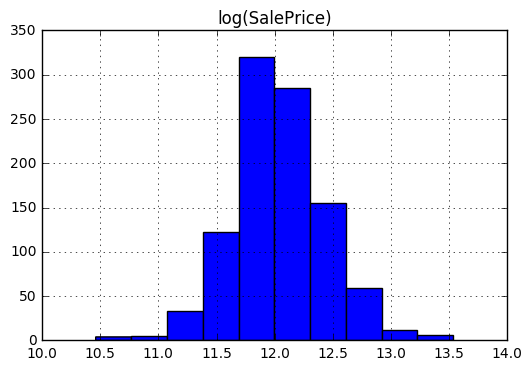

In [56]:
# Check log transform - looks good
%matplotlib inline
train['SalePrice'].log().as_data_frame().hist()

# Execute log transform
train['SalePrice'] = train['SalePrice'].log()
valid['SalePrice'] = valid['SalePrice'].log()
print(train[0:3, 'SalePrice'])

#### Split training data

In [57]:
half_train, other_half_train = train.split_frame([0.5], seed=12345)
half_valid, other_half_valid = valid.split_frame([0.5], seed=12345)
print(half_train.shape)
print(half_valid.shape)
print(other_half_train.shape)
print(other_half_valid.shape)
# no idea why this works better, but it does ... 
# could be a lucky split that happens to be more representative of test data
# could be that it just prevents overfitting

(504, 3205)
(230, 3205)
(497, 3205)
(229, 3205)


#### Define model with grid search function

In [58]:
def glm_grid(X, y, train, valid):
    
    """ Wrapper function for penalized GLM with alpha and lambda search.
    
    :param X: List of inputs.
    :param y: Name of target variable.
    :param train: Name of training H2OFrame.
    :param valid: Name of validation H2OFrame.
    :return: Best H2Omodel from H2OGeneralizedLinearEstimator

    """
    
    alpha_opts = [0.01, 0.25, 0.5, 0.99] # always keep some L2
    hyper_parameters = {"alpha":alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(
            family="gaussian",
            lambda_search=True,
            seed=12345),
        hyper_params=hyper_parameters)
    
    # train grid
    grid.train(y=y,
               x=X, 
               training_frame=train,
               validation_frame=valid)

    # show grid search results
    print(grid.show())

    best = grid.get_grid()[0]
    print(best)
    
    # plot top frame values
    yhat_frame = valid.cbind(best.predict(valid))
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')
    
    # select best model
    return best


#### Function to generate submission file

In [59]:
import re
import time

def gen_submission(model, test=test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param model: Model with which to score test data.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(model.predict(test).exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = '/Users/yy/Documents/DNSC_ML/regression/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)


#### Simple function to average predictions

In [60]:
import os

def pred_blender(dir_, files):
    
    """ Performs simple blending of prediction files. 
    
    :param dir_: Directory in which files to be read are stored.
    :param files: List of prediction files to be blended.
    
    """
    
    # read predictions in files list and cbind
    for i, file in enumerate(files):
        if i == 0:
            df = pd.read_csv(dir_ + os.sep + file).drop('SalePrice', axis=1)
        col = pd.read_csv(dir_ + os.sep + file).drop('Id', axis=1)
        col.columns = ['SalePrice' + str(i)]
        df = pd.concat([df, col], axis=1)
        
    # create mean prediction    
    df['mean'] = df.iloc[:, 1:].mean(axis=1)
    print(df.head())
        
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())        
        
    # write new submission file    
    df = df[['Id', 'mean']]
    df.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = '/Users/yy/Documents/DNSC_ML/regression/submission_' + str(time_stamp) + '.csv'
    df.to_csv(sub_fname, index=False)
     

#### First model on original numeric inputs

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.99]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_1_model_3   
1     [0.5]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_1_model_2   
2    [0.25]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_1_model_1   
3    [0.01]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_1_model_0   

   residual_deviance  
0  4.025940991543426  
1  4.037235202840883  
2  4.058507339499796  
3  4.491994155264081  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_627_sid_885b_model_python_1497992344846_1_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.021564404839388217
RMSE: 0.146848237440523
MAE: 0.09686367637083063
RMSLE: 0.011364228341693757
R^2: 0.862319569887144
Mean Residual Deviance: 0.021564404839388217
Null degrees of freedom:

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:03:15,0.000 sec,0,.31E0,2,0.1472858,0.1420261
,2017-06-20 17:03:15,0.001 sec,0,.3E0,2,0.1387711,0.1340858
,2017-06-20 17:03:15,0.002 sec,0,.29E0,2,0.1310096,0.1268453
,2017-06-20 17:03:15,0.004 sec,0,.27E0,2,0.1239348,0.1202429
,2017-06-20 17:03:15,0.005 sec,0,.26E0,2,0.1174861,0.1142224
---,---,---,---,---,---,---,---
,2017-06-20 17:03:15,0.270 sec,0,.39E-2,28,0.0211140,0.0177064
,2017-06-20 17:03:15,0.275 sec,0,.38E-2,29,0.0210799,0.0177301
,2017-06-20 17:03:15,0.278 sec,0,.36E-2,30,0.0210495,0.0177502
,2017-06-20 17:03:15,0.283 sec,0,.34E-2,30,0.0210200,0.0177665



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,11.9833
12.2061,12.3454
11.6784,11.6651
11.914,11.8164
12.6758,12.4798
12.861,12.7562
12.1035,12.0074
11.2898,11.3823
11.7714,11.7068
11.5843,11.4633



glm prediction progress: |████████████████████████████████████████████████| 100%


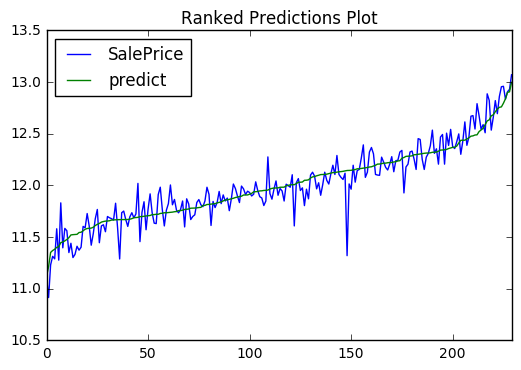

In [61]:
glm0_0 = glm_grid(original_nums, 'SalePrice', half_train, half_valid)
gen_submission(glm0_0) # Valid RMSE: ~0.1323, ~0.1445 on public leaderboard

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.99]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_2_model_3   
1     [0.5]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_2_model_2   
2    [0.25]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_2_model_1   
3    [0.01]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_2_model_0   

    residual_deviance  
0  3.3933211971158004  
1   3.402296538296244  
2  3.4124971533289354  
3   3.791603040179966  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_629_sid_885b_model_python_1497992344846_2_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.02227260217288583
RMSE: 0.14924008232671887
MAE: 0.1021767066612568
RMSLE: 0.011407191199535434
R^2: 0.854201320285019
Mean Residual Deviance: 0.02227260217288583
Null degrees of free

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:03:25,0.000 sec,0,.3E0,2,0.1442675,0.1766220
,2017-06-20 17:03:25,0.032 sec,0,.28E0,2,0.1365238,0.1655749
,2017-06-20 17:03:25,0.064 sec,0,.27E0,2,0.1294652,0.1554957
,2017-06-20 17:03:25,0.083 sec,0,.26E0,2,0.1230313,0.1462994
,2017-06-20 17:03:25,0.085 sec,0,.25E0,2,0.1171668,0.1379085
---,---,---,---,---,---,---,---
,2017-06-20 17:03:26,0.713 sec,0,.38E-2,27,0.0219279,0.0149371
,2017-06-20 17:03:26,0.715 sec,0,.36E-2,27,0.0218700,0.0149759
,2017-06-20 17:03:26,0.718 sec,0,.34E-2,28,0.0218168,0.0150147
,2017-06-20 17:03:26,0.721 sec,0,.33E-2,28,0.0217677,0.0150506



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.7906,11.8534
11.9117,11.9847
11.9767,11.9344
11.8451,11.8394
11.1346,11.3083
11.8845,11.8418
11.9382,11.907
11.8565,11.7382
11.9704,12.0465
12.6667,12.5716



glm prediction progress: |████████████████████████████████████████████████| 100%


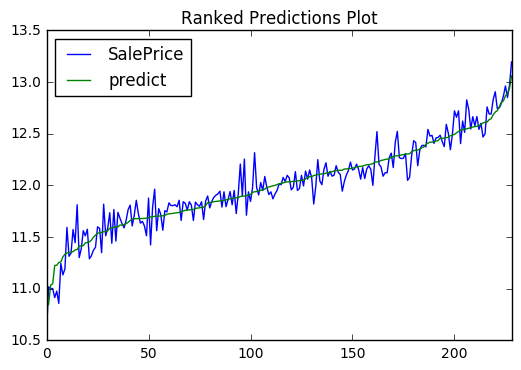

In [62]:
glm0_1 = glm_grid(original_nums, 'SalePrice', other_half_train, other_half_valid)
gen_submission(glm0_1) # Valid RMSE: 0.1492

#### Blend predictions

In [63]:
# pred_blender('../data/', 
#             ['submission_Mon_Jun_12_20_11_26_2017.csv',
#              'submission_Mon_Jun_12_20_11_59_2017.csv'])
# ~0.1434 on public leaderboard, better than single model!

#### Second model on encoded numeric inputs

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.99]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_3_model_3   
1     [0.5]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_3_model_2   
2    [0.25]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_3_model_1   
3    [0.01]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_3_model_0   

    residual_deviance  
0   3.488930637776299  
1  3.4913376929096507  
2  3.4990157882111257  
3   3.997336514136221  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_627_sid_885b_model_python_1497992344846_3_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.015012093014040086
RMSE: 0.12252384671581319
MAE: 0.08528286180109011
RMSLE: 0.009522758211279235
R^2: 0.9041535605336057
Mean Residual Deviance: 0.015012093014040086
Null degrees of 

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:03:37,0.000 sec,0,.31E0,2,0.1472858,0.1420261
,2017-06-20 17:03:37,0.004 sec,0,.3E0,2,0.1387711,0.1340858
,2017-06-20 17:03:37,0.008 sec,0,.29E0,2,0.1310096,0.1268453
,2017-06-20 17:03:37,0.010 sec,0,.27E0,2,0.1239348,0.1202429
,2017-06-20 17:03:37,0.012 sec,0,.26E0,2,0.1174861,0.1142224
---,---,---,---,---,---,---,---
,2017-06-20 17:03:37,0.364 sec,0,.39E-2,53,0.0144193,0.0155883
,2017-06-20 17:03:37,0.368 sec,0,.38E-2,53,0.0143705,0.0156278
,2017-06-20 17:03:37,0.373 sec,0,.36E-2,54,0.0143240,0.0156829
,2017-06-20 17:03:37,0.377 sec,0,.34E-2,54,0.0142796,0.0157547



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.111
12.2061,12.2717
11.6784,11.8223
11.914,11.78
12.6758,12.4837
12.861,12.6807
12.1035,11.9296
11.2898,11.3428
11.7714,11.6443
11.5843,11.4845



glm prediction progress: |████████████████████████████████████████████████| 100%


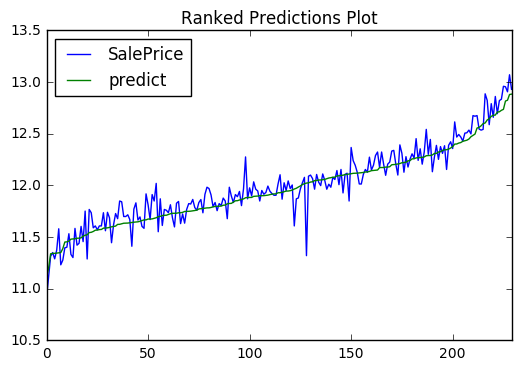

In [64]:
glm1_0 = glm_grid(encoded_nums, 'SalePrice', half_train, half_valid)
gen_submission(glm1_0) # Valid RMSE: ~0.1231, ~0.1411 on public leaderboard

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.99]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_4_model_3   
1     [0.5]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_4_model_2   
2    [0.25]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_4_model_1   
3    [0.01]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_4_model_0   

    residual_deviance  
0  3.7852809319413194  
1   3.831326191021232  
2  3.9229729057962968  
3   4.846647482257712  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_629_sid_885b_model_python_1497992344846_4_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0169886291998396
RMSE: 0.1303404357819921
MAE: 0.09068537009077933
RMSLE: 0.010021159142599148
R^2: 0.8887907354391067
Mean Residual Deviance: 0.0169886291998396
Null degrees of freed

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:03:41,0.000 sec,0,.3E0,2,0.1442675,0.1766220
,2017-06-20 17:03:41,0.003 sec,0,.28E0,2,0.1365238,0.1655749
,2017-06-20 17:03:41,0.005 sec,0,.27E0,2,0.1294652,0.1554957
,2017-06-20 17:03:41,0.008 sec,0,.26E0,2,0.1230313,0.1462994
,2017-06-20 17:03:41,0.010 sec,0,.25E0,3,0.1168420,0.1378170
---,---,---,---,---,---,---,---
,2017-06-20 17:03:41,0.389 sec,0,.38E-2,56,0.0130834,0.0222400
,2017-06-20 17:03:41,0.394 sec,0,.36E-2,56,0.0129977,0.0225006
,2017-06-20 17:03:41,0.398 sec,0,.34E-2,56,0.0129195,0.0227612
,2017-06-20 17:03:41,0.401 sec,0,.33E-2,58,0.0128443,0.0229615



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.7906,11.7583
11.9117,11.9212
11.9767,11.8298
11.8451,11.7366
11.1346,11.2233
11.8845,11.8195
11.9382,11.8688
11.8565,11.742
11.9704,11.9488
12.6667,12.5613



glm prediction progress: |████████████████████████████████████████████████| 100%


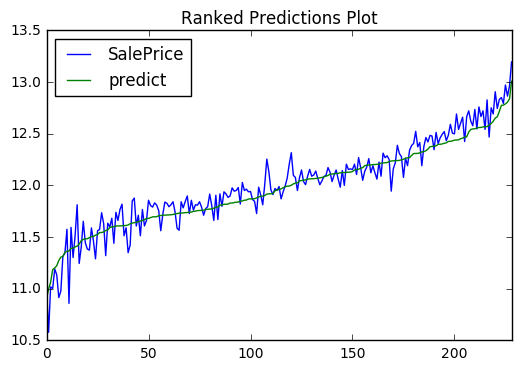

In [65]:
glm1_1 = glm_grid(encoded_nums, 'SalePrice', other_half_train, other_half_valid)
gen_submission(glm1_1) # Valid RMSE: ~0.1303

#### Blend predictions

In [66]:
# pred_blender('../data/', 
#             ['submission_Mon_Jun_12_20_32_07_2017.csv',
#              'submission_Mon_Jun_12_20_32_35_2017.csv'])
# ~0.14227 on public leaderboard, worse than single model!

#### Third model on encoded, combined numeric inputs

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.01]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_5_model_0   
1    [0.25]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_5_model_1   
2     [0.5]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_5_model_2   
3    [0.99]  Grid_GLM_py_627_sid_885b_model_python_1497992344846_5_model_3   

    residual_deviance  
0  3.3743846078151876  
1   3.534968873366192  
2  3.5601124527528905  
3   3.603332339686286  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_627_sid_885b_model_python_1497992344846_5_model_0


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.013198605617116735
RMSE: 0.11488518449790093
MAE: 0.08197911629520888
RMSLE: 0.008961355351292359
R^2: 0.9157319800018119
Mean Residual Deviance: 0.013198605617116735
Null degrees of 

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:04:13,0.000 sec,0,.32E2,29,0.1539905,0.1482908
,2017-06-20 17:04:13,0.089 sec,0,.3E2,36,0.1490574,0.1437277
,2017-06-20 17:04:13,0.173 sec,0,.29E2,61,0.1432922,0.1384705
,2017-06-20 17:04:13,0.243 sec,0,.27E2,97,0.1363307,0.1322392
,2017-06-20 17:04:13,0.336 sec,0,.26E2,113,0.1291616,0.1258439
---,---,---,---,---,---,---,---
,2017-06-20 17:04:45,32.500 sec,0,.4E0,683,0.0123037,0.0158202
,2017-06-20 17:04:46,33.131 sec,0,.38E0,676,0.0121804,0.0161324
,2017-06-20 17:04:47,33.827 sec,0,.36E0,674,0.0120594,0.0164731
,2017-06-20 17:04:47,34.492 sec,0,.35E0,674,0.0119419,0.0168412



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.094
12.2061,12.1965
11.6784,11.807
11.914,11.7915
12.6758,12.4611
12.861,12.662
12.1035,11.9512
11.2898,11.379
11.7714,11.6674
11.5843,11.5342



glm prediction progress: |████████████████████████████████████████████████| 100%


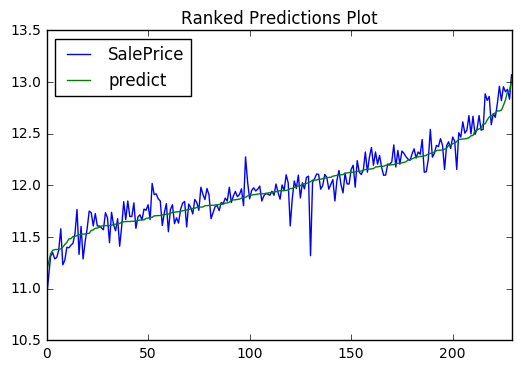

In [67]:
glm2_0 = glm_grid(encoded_combined_nums, 'SalePrice', half_train, half_valid)
gen_submission(glm2_0) # Valid RMSE: ~0.1212, ~0.1406 on public leaderboard

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.99]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_6_model_3   
1     [0.5]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_6_model_2   
2    [0.25]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_6_model_1   
3    [0.01]  Grid_GLM_py_629_sid_885b_model_python_1497992344846_6_model_0   

    residual_deviance  
0   3.465423250028156  
1   3.484410532309514  
2  3.5068234465520174  
3  3.8124947991604348  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_629_sid_885b_model_python_1497992344846_6_model_3


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.012023673154745467
RMSE: 0.10965251093680194
MAE: 0.07917723783945183
RMSLE: 0.008537136856628097
R^2: 0.921291833900735
Mean Residual Deviance: 0.012023673154745467
Null degrees of f

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-20 17:06:56,0.000 sec,0,.31E0,3,0.1435988,0.1781741
,2017-06-20 17:06:56,0.059 sec,0,.29E0,3,0.1346207,0.1670863
,2017-06-20 17:06:56,0.119 sec,0,.28E0,3,0.1264510,0.1569683
,2017-06-20 17:06:56,0.177 sec,0,.27E0,5,0.1184376,0.1468513
,2017-06-20 17:06:56,0.238 sec,0,.26E0,5,0.1107282,0.1370656
---,---,---,---,---,---,---,---
,2017-06-20 17:07:06,10.321 sec,0,.39E-2,85,0.0093242,0.0164315
,2017-06-20 17:07:06,10.503 sec,0,.37E-2,90,0.0092233,0.0164574
,2017-06-20 17:07:07,10.678 sec,0,.35E-2,92,0.0091179,0.0164836
,2017-06-20 17:07:07,10.906 sec,0,.34E-2,98,0.0090265,0.0165286



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.7906,11.7292
11.9117,11.899
11.9767,11.8275
11.8451,11.7033
11.1346,11.1528
11.8845,11.8053
11.9382,11.9072
11.8565,11.7433
11.9704,11.9721
12.6667,12.5147



glm prediction progress: |████████████████████████████████████████████████| 100%


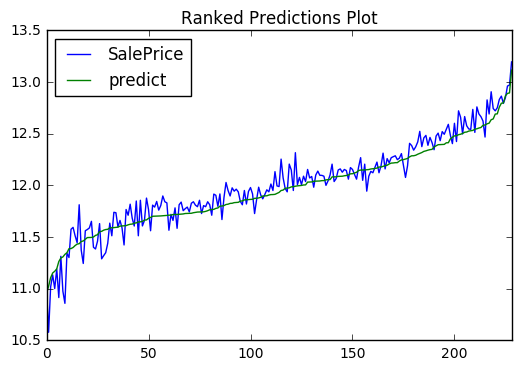

In [68]:
glm2_1 = glm_grid(encoded_combined_nums, 'SalePrice', other_half_train, other_half_valid)
gen_submission(glm2_1) # Valid RMSE: ~0.1229

#### Blend predictions

In [76]:
# pred_blender('../data/', 
#             ['submission_Mon_Jun_12_20_39_23_2017.csv',
#              'submission_Mon_Jun_12_20_40_00_2017.csv'])
# ~0.1382 on public leaderboard, better than single model!

In [77]:
# Shutdown H2O - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
